In [1]:
name <- "COVIDRNASeq"
name2 <- "20230216"

# Library Import

In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(gdata))
suppressPackageStartupMessages(library(mygene))
suppressPackageStartupMessages(library(edgeR))
suppressPackageStartupMessages(library(gplots))
suppressPackageStartupMessages(library(Glimma))

# Data Import
### Metadata

In [3]:
meta <- read.delim("Updated_Cornell_Metadata_08072020_KF_20210908.txt", stringsAsFactors = F)
head(meta)
colnames(meta)

SampleID            SampleID_nobatch Subject      SamplePlate_orig
1 COVSUBJ_0001_1_P_HA COVSUBJ_0001_1_P COVSUBJ_0001 P10             
2 COVSUBJ_0002_1_N_HA COVSUBJ_0002_1_N COVSUBJ_0002 P1              
3 COVSUBJ_0003_1_P_HA COVSUBJ_0003_1_P COVSUBJ_0003 P1              
4 COVSUBJ_0004_1_N_HA COVSUBJ_0004_1_N COVSUBJ_0004 P1              
5 COVSUBJ_0004_2_N_HA COVSUBJ_0004_2_N COVSUBJ_0004 P1              
6 COVSUBJ_0005_1_N_HA COVSUBJ_0005_1_N COVSUBJ_0005 P1              
  IncludeInAnalysis Notes_UPDATE DeDupList paired Replicate SequencingBatch ⋯
1 TRUE                            TRUE            1         B2_HA           ⋯
2 TRUE                            TRUE            1         B3_HA           ⋯
3 TRUE                            TRUE            1         B3_HA           ⋯
4 TRUE                           FALSE            1         B3_HA           ⋯
5 TRUE                            TRUE            2         B3_HA           ⋯
6 TRUE                            TRUE            1         B3_HA           ⋯
  DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay
1 NA                                                      
2 NA                                                      
3 NA                                                      
4 NA                                                      
5 NA                                                      
6 NA                                                      
  VENT_Total_Ventilation_Orders VENT_Tracheostomy_Performed
1 NA                            NA                         
2 NA                            NA                         
3 NA                            NA                         
4 NA                            NA                         
5 NA                            NA                         
6 NA                            NA                         
  VENT_Tube_Exchange_Performed VENT_Total_Ventilation_Minutes
1 NA                           NA                            
2 NA                           NA                            
3 NA                           NA                            
4 NA                           NA                            
5 NA                           NA                            
6 NA                           NA                            
  VENT_First_Ventilation_Date_RelativeHour RC_Patient_Age RC_HISTORY_BMI
1 NA                                       NA             NA            
2 NA                                       NA             NA            
3 NA                                       NA             NA            
4 NA                                       NA             NA            
5 NA                                       NA             NA            
6 NA                                       NA             NA            
  RC_HISTORY_Pregnancy RC_HISTORY_PregnancyWeeks
1 NA                   NA                       
2 NA                   NA                       
3 NA                   NA                       
4 NA                   NA                       
5 NA                   NA                       
6 NA                   NA

[1] "SampleID"                                                
 [2] "SampleID_nobatch"                                        
 [3] "Subject"                                                 
 [4] "SamplePlate_orig"                                        
 [5] "IncludeInAnalysis"                                       
 [6] "Notes_UPDATE"                                            
 [7] "DeDupList"                                               
 [8] "paired"                                                  
 [9] "Replicate"                                               
[10] "SequencingBatch"                                         
[11] "DataFreeze1"                                             
[12] "DataFreeze2"                                             
[13] "Class"                                                   
[14] "RT_PCR_Result"                                           
[15] "Ct"                                                      
[16] "ViralLoad_qPCR"                                          
[17] "Type"                                                    
[18] "Total"                                                   
[19] "unclassified"                                            
[20] "Bacteria"                                                
[21] "Archaea"                                                 
[22] "Fungi"                                                   
[23] "Viruses"                                                 
[24] "Homo.sapiens"                                            
[25] "SARS_CoV2"                                               
[26] "SARS_CoV2_fraction"                                      
[27] "COVTEST_DateFirstTest"                                   
[28] "COVTEST_DateFirstPositive"                               
[29] "COVTEST_Type"                                            
[30] "Patient_Sex"                                             
[31] "Patient_Race1"                                           
[32] "Patient_Race2"                                           
[33] "Patient_Race_NLP"                                        
[34] "Patient_Ethnicity"                                       
[35] "Patient_Ethnicity_NLP"                                   
[36] "COVTEST_Age"                                             
[37] "COVTEST_Location"                                        
[38] "VISIT_CovidDiagnosis"                                    
[39] "VISIT_CovidDiagnosisSuspected"                           
[40] "VISIT_ClinicVisitFever"                                  
[41] "VISIT_CovidIndicativeSymptoms"                           
[42] "VISIT_DEATH"                                             
[43] "VISIT_DEATH_DATE"                                        
[44] "Patient_Smoking_MostRecent"                              
[45] "Patient_Smoking_MostRecentDate_RelativeDay"              
[46] "DIAGNOSIS_AIDS"                                          
[47] "DIAGNOSIS_AIDS_LastDxDate_RelativeDay"                   
[48] "DIAGNOSIS_Asthma"                                        
[49] "DIAGNOSIS_Asthma_LastDxDate_RelativeDay"                 
[50] "DIAGNOSIS_Cancer"                                        
[51] "DIAGNOSIS_Cancer_LastDxDate_RelativeDay"                 
[52] "DIAGNOSIS_ChronicKidneyDisease"                          
[53] "DIAGNOSIS_ChronicKidneyDisease_LastDxDate_RelativeDay"   
[54] "DIAGNOSIS_ChronicLiverDisease"                           
[55] "DIAGNOSIS_ChronicLiverDisease_LastDxDate_RelativeDay"    
[56] "DIAGNOSIS_COPD"                                          
[57] "DIAGNOSIS_COPD_LastDxDate_RelativeDay"                   
[58] "DIAGNOSIS_CongestiveHeartFailure"                        
[59] "DIAGNOSIS_CongestiveHeartFailure_LastDxDate_RelativeDay" 
[60] "DIAGNOSIS_CoronaryArteryDisease"                         
[61] "DIAGNOSIS_CoronaryArteryDisease_LastDxDate_RelativeDay"  
[62] "DIAGNOSIS_Diabetes"                                      
[63] "DIAGNOSIS_Diabetes_LastDxDa

In [5]:
# Remove conflicting samples

meta <- meta[ ! meta$SampleID %in% c("COVSUBJ_0137_1_N_HA", "COVSUBJ_0146_1_N_HA", "COVSUBJ_0376_1_N_HA", "COVSUBJ_0461_1_N_HA", "COVSUBJ_0558_1_N_HA", "COVSUBJ_0619_1_N_HA"),]
head(meta)
table(meta$Type, useNA = "ifany")

SampleID            SampleID_nobatch Subject      SamplePlate_orig
1 COVSUBJ_0001_1_P_HA COVSUBJ_0001_1_P COVSUBJ_0001 P10             
2 COVSUBJ_0002_1_N_HA COVSUBJ_0002_1_N COVSUBJ_0002 P1              
3 COVSUBJ_0003_1_P_HA COVSUBJ_0003_1_P COVSUBJ_0003 P1              
4 COVSUBJ_0004_1_N_HA COVSUBJ_0004_1_N COVSUBJ_0004 P1              
5 COVSUBJ_0004_2_N_HA COVSUBJ_0004_2_N COVSUBJ_0004 P1              
6 COVSUBJ_0005_1_N_HA COVSUBJ_0005_1_N COVSUBJ_0005 P1              
  IncludeInAnalysis Notes_UPDATE DeDupList paired Replicate SequencingBatch ⋯
1 TRUE                            TRUE            1         B2_HA           ⋯
2 TRUE                            TRUE            1         B3_HA           ⋯
3 TRUE                            TRUE            1         B3_HA           ⋯
4 TRUE                           FALSE            1         B3_HA           ⋯
5 TRUE                            TRUE            2         B3_HA           ⋯
6 TRUE                            TRUE            1         B3_HA           ⋯
  DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay
1 NA                                                      
2 NA                                                      
3 NA                                                      
4 NA                                                      
5 NA                                                      
6 NA                                                      
  VENT_Total_Ventilation_Orders VENT_Tracheostomy_Performed
1 NA                            NA                         
2 NA                            NA                         
3 NA                            NA                         
4 NA                            NA                         
5 NA                            NA                         
6 NA                            NA                         
  VENT_Tube_Exchange_Performed VENT_Total_Ventilation_Minutes
1 NA                           NA                            
2 NA                           NA                            
3 NA                           NA                            
4 NA                           NA                            
5 NA                           NA                            
6 NA                           NA                            
  VENT_First_Ventilation_Date_RelativeHour RC_Patient_Age RC_HISTORY_BMI
1 NA                                       NA             NA            
2 NA                                       NA             NA            
3 NA                                       NA             NA            
4 NA                                       NA             NA            
5 NA                                       NA             NA            
6 NA                                       NA             NA            
  RC_HISTORY_Pregnancy RC_HISTORY_PregnancyWeeks
1 NA                   NA                       
2 NA                   NA                       
3 NA                   NA                       
4 NA                   NA                       
5 NA                   NA                       
6 NA                   NA


               High                 Low              Medium                None 
                 62                  52                 101                 429 
OtherViralInfection 
                 82 

### Count Data

In [6]:
counts <- read.csv("20221117_NEWHF_RSEM_Unnormalized_Counts_rRNA_removed.csv",stringsAsFactors=F)
head(counts)
dim(counts)

X                        COVSUBJ_0001_1_P_HA_filtered.human
1 ENSG00000000003_TSPAN6   2891                              
2 ENSG00000000005_TNMD        0                              
3 ENSG00000000419_DPM1      551                              
4 ENSG00000000457_SCYL3     737                              
5 ENSG00000000460_C1orf112  168                              
6 ENSG00000000938_FGR       397                              
  COVSUBJ_0002_1_N_HA_filtered.human COVSUBJ_0003_1_P_HA_filtered.human
1 1448                               1483                              
2    0                                  0                              
3  184                                199                              
4  177                                256                              
5   28                                 76                              
6   56                               1066                              
  COVSUBJ_0004_1_N_HA_filtered.human COVSUBJ_0004_2_N_HA_filtered.human
1 53                                 3232                              
2  0                                    0                              
3  4                                   35                              
4  2                                  168                              
5  0                                    0                              
6  3                                   31                              
  COVSUBJ_0005_1_N_HA_filtered.human COVSUBJ_0006_1_N_HA_filtered.human
1 138                                1372                              
2   0                                   0                              
3   1                                 153                              
4   6                                 164                              
5   0                                  81                              
6  30                                 217                              
  COVSUBJ_0007_1_N_HA_filtered.human COVSUBJ_0007_2_N_HA_filtered.human ⋯
1  443                                 1                                ⋯
2    0                                 0                                ⋯
3  174                                 2                                ⋯
4  103                                 2                                ⋯
5   22                                 2                                ⋯
6 3150                               170                                ⋯
  COVSUBJ_0660_1_P_HA_filtered.human COVSUBJ_0661_1_N_HA_filtered.human
1 1747                               18                                
2    0                                0                                
3  283                                0                                
4  201                                1                                
5   37                                0                                
6  575                               14                                
  COVSUBJ_0662_1_P_HA_filtered.human COVSUBJ_0663_1_P_HA_filtered.human
1 2299                               1979                              
2   10                                  0                              
3  220                                302                              
4  383                                296                              
5   36                                 35                              
6  195                                 12                              
  COVSUBJ_0664_1_P_HA_filtered.human COVSUBJ_0665_1_P_HA_filtered.human
1 3168                               4638                              
2   12                                  0                              
3  376                                419                              
4  551                                403                              
5  120                                115                              
6  141                                192                              
  COVSUBJ_0666_1_N_HA_filt

[1] 60683   727

In [7]:
# Rename count rows
counts_names <- counts$X
counts_matrix <- as.matrix(counts[2:727])
row.names(counts_matrix) <- counts_names
class(counts_matrix)
head(counts_matrix)

dim(counts_matrix)
dim(meta)

[1] "matrix" "array"

COVSUBJ_0001_1_P_HA_filtered.human
ENSG00000000003_TSPAN6   2891                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      551                              
ENSG00000000457_SCYL3     737                              
ENSG00000000460_C1orf112  168                              
ENSG00000000938_FGR       397                              
                         COVSUBJ_0002_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   1448                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      184                              
ENSG00000000457_SCYL3     177                              
ENSG00000000460_C1orf112   28                              
ENSG00000000938_FGR        56                              
                         COVSUBJ_0003_1_P_HA_filtered.human
ENSG00000000003_TSPAN6   1483                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      199                              
ENSG00000000457_SCYL3     256                              
ENSG00000000460_C1orf112   76                              
ENSG00000000938_FGR      1066                              
                         COVSUBJ_0004_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   53                                
ENSG00000000005_TNMD      0                                
ENSG00000000419_DPM1      4                                
ENSG00000000457_SCYL3     2                                
ENSG00000000460_C1orf112  0                                
ENSG00000000938_FGR       3                                
                         COVSUBJ_0004_2_N_HA_filtered.human
ENSG00000000003_TSPAN6   3232                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1       35                              
ENSG00000000457_SCYL3     168                              
ENSG00000000460_C1orf112    0                              
ENSG00000000938_FGR        31                              
                         COVSUBJ_0005_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   138                               
ENSG00000000005_TNMD       0                               
ENSG00000000419_DPM1       1                               
ENSG00000000457_SCYL3      6                               
ENSG00000000460_C1orf112   0                               
ENSG00000000938_FGR       30                               
                         COVSUBJ_0006_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   1372                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      153                              
ENSG00000000457_SCYL3     164                              
ENSG00000000460_C1orf112   81                              
ENSG00000000938_FGR       217                              
                         COVSUBJ_0007_1_N_HA_filtered.human
ENSG00000000003_TSPAN6    443                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      174                              
ENSG00000000457_SCYL3     103                              
ENSG00000000460_C1orf112   22                              
ENSG00000000938_FGR      3150                              
                         COVSUBJ_0007_2_N_HA_filtered.human
ENSG00000000003_TSPAN6     1                               
ENSG00000000005_TNMD       0                               
ENSG00000000419_DPM1       2                               
ENSG00000000457_SCYL3      2                               
ENSG00000000460_C1orf112   2                               
ENSG00000000938_FGR      170                               
                         COVSUBJ_0008_1_N_HA_filtered.human ⋯
ENSG00000000003_TSPAN6   2525                               ⋯
ENSG00000000005_TNMD        3                               ⋯
ENSG00000000419_DPM1      350                              

[1] 60683   726

[1] 726  82

In [8]:
# Creation of new column in order to have the name of the counts(column names) match id's in the meta file
meta$newID = paste(meta$SampleID, "_filtered.human", sep="")
row.names(meta) <- meta$newID
head(meta)

SampleID            SampleID_nobatch
COVSUBJ_0001_1_P_HA_filtered.human COVSUBJ_0001_1_P_HA COVSUBJ_0001_1_P
COVSUBJ_0002_1_N_HA_filtered.human COVSUBJ_0002_1_N_HA COVSUBJ_0002_1_N
COVSUBJ_0003_1_P_HA_filtered.human COVSUBJ_0003_1_P_HA COVSUBJ_0003_1_P
COVSUBJ_0004_1_N_HA_filtered.human COVSUBJ_0004_1_N_HA COVSUBJ_0004_1_N
COVSUBJ_0004_2_N_HA_filtered.human COVSUBJ_0004_2_N_HA COVSUBJ_0004_2_N
COVSUBJ_0005_1_N_HA_filtered.human COVSUBJ_0005_1_N_HA COVSUBJ_0005_1_N
                                   Subject      SamplePlate_orig
COVSUBJ_0001_1_P_HA_filtered.human COVSUBJ_0001 P10             
COVSUBJ_0002_1_N_HA_filtered.human COVSUBJ_0002 P1              
COVSUBJ_0003_1_P_HA_filtered.human COVSUBJ_0003 P1              
COVSUBJ_0004_1_N_HA_filtered.human COVSUBJ_0004 P1              
COVSUBJ_0004_2_N_HA_filtered.human COVSUBJ_0004 P1              
COVSUBJ_0005_1_N_HA_filtered.human COVSUBJ_0005 P1              
                                   IncludeInAnalysis Notes_UPDATE DeDupList
COVSUBJ_0001_1_P_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0002_1_N_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0003_1_P_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0004_1_N_HA_filtered.human TRUE                           FALSE    
COVSUBJ_0004_2_N_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0005_1_N_HA_filtered.human TRUE                            TRUE    
                                   paired Replicate SequencingBatch ⋯
COVSUBJ_0001_1_P_HA_filtered.human        1         B2_HA           ⋯
COVSUBJ_0002_1_N_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0003_1_P_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0004_1_N_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0004_2_N_HA_filtered.human        2         B3_HA           ⋯
COVSUBJ_0005_1_N_HA_filtered.human        1         B3_HA           ⋯
                                   VENT_Total_Ventilation_Orders
COVSUBJ_0001_1_P_HA_filtered.human NA                           
COVSUBJ_0002_1_N_HA_filtered.human NA                           
COVSUBJ_0003_1_P_HA_filtered.human NA                           
COVSUBJ_0004_1_N_HA_filtered.human NA                           
COVSUBJ_0004_2_N_HA_filtered.human NA                           
COVSUBJ_0005_1_N_HA_filtered.human NA                           
                                   VENT_Tracheostomy_Performed
COVSUBJ_0001_1_P_HA_filtered.human NA                         
COVSUBJ_0002_1_N_HA_filtered.human NA                         
COVSUBJ_0003_1_P_HA_filtered.human NA                         
COVSUBJ_0004_1_N_HA_filtered.human NA                         
COVSUBJ_0004_2_N_HA_filtered.human NA                         
COVSUBJ_0005_1_N_HA_filtered.human NA                         
                                   VENT_Tube_Exchange_Performed
COVSUBJ_0001_1_P_HA_filtered.human NA                          
COVSUBJ_0002_1_N_HA_filtered.human NA                          
COVSUBJ_0003_1_P_HA_filtered.human NA                          
COVSUBJ_0004_1_N_HA_filtered.human NA                          
COVSUBJ_0004_2_N_HA_filtered.human NA                          
COVSUBJ_0005_1_N_HA_filtered.human NA                          
                                   VENT_Total_Ventilation_Minutes
COVSUBJ_0001_1_P_HA_filtered.human NA                            
COVSUBJ_0002_1_N_HA_filtered.human NA                            
COVSUBJ_0003_1_P_HA_filtered.human NA                            
COVSUBJ_0004_1_N_HA_filtered.human NA                            
COVSUBJ_0004_2_N_HA_filtered.human NA                            
COVSUBJ_0005_1_N_HA_filtered.human NA                            
                                   VENT_First_Ventilation_Date_RelativeHour
COVSUBJ_0001_1_P_HA_filtered.human NA                                      
COVSUBJ_0002_1_N_HA_filtered.human NA                                      
COVSUBJ_0003_1_P_HA_

In [9]:
# dplyr to reorder metadata and counts to ensure they line up
# Sort metadata to match order of sample names in GeneCounts

geneCount_names_order <- colnames(counts_matrix)
meta$newID <- reorder.factor(meta$newID, new.order=geneCount_names_order)
meta <- meta %>% arrange(newID)
head(meta)
head(counts_matrix)

SampleID            SampleID_nobatch
COVSUBJ_0001_1_P_HA_filtered.human COVSUBJ_0001_1_P_HA COVSUBJ_0001_1_P
COVSUBJ_0002_1_N_HA_filtered.human COVSUBJ_0002_1_N_HA COVSUBJ_0002_1_N
COVSUBJ_0003_1_P_HA_filtered.human COVSUBJ_0003_1_P_HA COVSUBJ_0003_1_P
COVSUBJ_0004_1_N_HA_filtered.human COVSUBJ_0004_1_N_HA COVSUBJ_0004_1_N
COVSUBJ_0004_2_N_HA_filtered.human COVSUBJ_0004_2_N_HA COVSUBJ_0004_2_N
COVSUBJ_0005_1_N_HA_filtered.human COVSUBJ_0005_1_N_HA COVSUBJ_0005_1_N
                                   Subject      SamplePlate_orig
COVSUBJ_0001_1_P_HA_filtered.human COVSUBJ_0001 P10             
COVSUBJ_0002_1_N_HA_filtered.human COVSUBJ_0002 P1              
COVSUBJ_0003_1_P_HA_filtered.human COVSUBJ_0003 P1              
COVSUBJ_0004_1_N_HA_filtered.human COVSUBJ_0004 P1              
COVSUBJ_0004_2_N_HA_filtered.human COVSUBJ_0004 P1              
COVSUBJ_0005_1_N_HA_filtered.human COVSUBJ_0005 P1              
                                   IncludeInAnalysis Notes_UPDATE DeDupList
COVSUBJ_0001_1_P_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0002_1_N_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0003_1_P_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0004_1_N_HA_filtered.human TRUE                           FALSE    
COVSUBJ_0004_2_N_HA_filtered.human TRUE                            TRUE    
COVSUBJ_0005_1_N_HA_filtered.human TRUE                            TRUE    
                                   paired Replicate SequencingBatch ⋯
COVSUBJ_0001_1_P_HA_filtered.human        1         B2_HA           ⋯
COVSUBJ_0002_1_N_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0003_1_P_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0004_1_N_HA_filtered.human        1         B3_HA           ⋯
COVSUBJ_0004_2_N_HA_filtered.human        2         B3_HA           ⋯
COVSUBJ_0005_1_N_HA_filtered.human        1         B3_HA           ⋯
                                   VENT_Total_Ventilation_Orders
COVSUBJ_0001_1_P_HA_filtered.human NA                           
COVSUBJ_0002_1_N_HA_filtered.human NA                           
COVSUBJ_0003_1_P_HA_filtered.human NA                           
COVSUBJ_0004_1_N_HA_filtered.human NA                           
COVSUBJ_0004_2_N_HA_filtered.human NA                           
COVSUBJ_0005_1_N_HA_filtered.human NA                           
                                   VENT_Tracheostomy_Performed
COVSUBJ_0001_1_P_HA_filtered.human NA                         
COVSUBJ_0002_1_N_HA_filtered.human NA                         
COVSUBJ_0003_1_P_HA_filtered.human NA                         
COVSUBJ_0004_1_N_HA_filtered.human NA                         
COVSUBJ_0004_2_N_HA_filtered.human NA                         
COVSUBJ_0005_1_N_HA_filtered.human NA                         
                                   VENT_Tube_Exchange_Performed
COVSUBJ_0001_1_P_HA_filtered.human NA                          
COVSUBJ_0002_1_N_HA_filtered.human NA                          
COVSUBJ_0003_1_P_HA_filtered.human NA                          
COVSUBJ_0004_1_N_HA_filtered.human NA                          
COVSUBJ_0004_2_N_HA_filtered.human NA                          
COVSUBJ_0005_1_N_HA_filtered.human NA                          
                                   VENT_Total_Ventilation_Minutes
COVSUBJ_0001_1_P_HA_filtered.human NA                            
COVSUBJ_0002_1_N_HA_filtered.human NA                            
COVSUBJ_0003_1_P_HA_filtered.human NA                            
COVSUBJ_0004_1_N_HA_filtered.human NA                            
COVSUBJ_0004_2_N_HA_filtered.human NA                            
COVSUBJ_0005_1_N_HA_filtered.human NA                            
                                   VENT_First_Ventilation_Date_RelativeHour
COVSUBJ_0001_1_P_HA_filtered.human NA                                      
COVSUBJ_0002_1_N_HA_filtered.human NA                                      
COVSUBJ_0003_1_P_HA_

COVSUBJ_0001_1_P_HA_filtered.human
ENSG00000000003_TSPAN6   2891                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      551                              
ENSG00000000457_SCYL3     737                              
ENSG00000000460_C1orf112  168                              
ENSG00000000938_FGR       397                              
                         COVSUBJ_0002_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   1448                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      184                              
ENSG00000000457_SCYL3     177                              
ENSG00000000460_C1orf112   28                              
ENSG00000000938_FGR        56                              
                         COVSUBJ_0003_1_P_HA_filtered.human
ENSG00000000003_TSPAN6   1483                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      199                              
ENSG00000000457_SCYL3     256                              
ENSG00000000460_C1orf112   76                              
ENSG00000000938_FGR      1066                              
                         COVSUBJ_0004_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   53                                
ENSG00000000005_TNMD      0                                
ENSG00000000419_DPM1      4                                
ENSG00000000457_SCYL3     2                                
ENSG00000000460_C1orf112  0                                
ENSG00000000938_FGR       3                                
                         COVSUBJ_0004_2_N_HA_filtered.human
ENSG00000000003_TSPAN6   3232                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1       35                              
ENSG00000000457_SCYL3     168                              
ENSG00000000460_C1orf112    0                              
ENSG00000000938_FGR        31                              
                         COVSUBJ_0005_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   138                               
ENSG00000000005_TNMD       0                               
ENSG00000000419_DPM1       1                               
ENSG00000000457_SCYL3      6                               
ENSG00000000460_C1orf112   0                               
ENSG00000000938_FGR       30                               
                         COVSUBJ_0006_1_N_HA_filtered.human
ENSG00000000003_TSPAN6   1372                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      153                              
ENSG00000000457_SCYL3     164                              
ENSG00000000460_C1orf112   81                              
ENSG00000000938_FGR       217                              
                         COVSUBJ_0007_1_N_HA_filtered.human
ENSG00000000003_TSPAN6    443                              
ENSG00000000005_TNMD        0                              
ENSG00000000419_DPM1      174                              
ENSG00000000457_SCYL3     103                              
ENSG00000000460_C1orf112   22                              
ENSG00000000938_FGR      3150                              
                         COVSUBJ_0007_2_N_HA_filtered.human
ENSG00000000003_TSPAN6     1                               
ENSG00000000005_TNMD       0                               
ENSG00000000419_DPM1       2                               
ENSG00000000457_SCYL3      2                               
ENSG00000000460_C1orf112   2                               
ENSG00000000938_FGR      170                               
                         COVSUBJ_0008_1_N_HA_filtered.human ⋯
ENSG00000000003_TSPAN6   2525                               ⋯
ENSG00000000005_TNMD        3                               ⋯
ENSG00000000419_DPM1      350                              

# Annotation Integration

In [10]:
geneid <- sapply(strsplit(rownames(counts_matrix), "_", fixed=T), function(x) x[1])
genes<- queryMany(geneid, scopes=c("ensembl.gene"), fields=c("symbol", "entrezgene"), species="human", returnall=FALSE)

Querying chunk 1

Querying chunk 2

Querying chunk 3

Querying chunk 4

Querying chunk 5

Querying chunk 6

Querying chunk 7

Querying chunk 8

Querying chunk 9

Querying chunk 10

Querying chunk 11

Querying chunk 12

Querying chunk 13

Querying chunk 14

Querying chunk 15

Querying chunk 16

Querying chunk 17

Querying chunk 18

Querying chunk 19

Querying chunk 20

Querying chunk 21

Querying chunk 22

Querying chunk 23

Querying chunk 24

Querying chunk 25

Querying chunk 26

Querying chunk 27

Querying chunk 28

Querying chunk 29

Querying chunk 30

Querying chunk 31

Querying chunk 32

Querying chunk 33

Querying chunk 34

Querying chunk 35

Querying chunk 36

Querying chunk 37

Querying chunk 38

Querying chunk 39

Querying chunk 40

Querying chunk 41

Querying chunk 42

Querying chunk 43

Querying chunk 44

Querying chunk 45

Querying chunk 46

Querying chunk 47

Querying chunk 48

Querying chunk 49

Querying chunk 50

Querying chunk 51

Querying chunk 52

Querying chunk 53

Qu

Finished
Pass returnall=TRUE to return lists of duplicate or missing query terms.


In [11]:
row.names(genes) <-genes$query
counts2 <-counts_matrix
row.names(counts2) <-geneid
counts1 <-counts2[,1:2]
genes1 <-merge(genes, counts1, by="row.names", all.x=F, all.y=T)

genes <-genes1[,c("query","entrezgene","symbol")]
colnames(genes) <-c("ENSEMBL","ENTREZID","SYMBOL")
head(genes)

ENSEMBL         ENTREZID SYMBOL  
1 ENSG00000000003 7105     TSPAN6  
2 ENSG00000000005 64102    TNMD    
3 ENSG00000000419 8813     DPM1    
4 ENSG00000000457 57147    SCYL3   
5 ENSG00000000460 55732    C1orf112
6 ENSG00000000938 2268     FGR

# Assess data distribution and normalize data 

In [12]:
x <- DGEList(counts = counts_matrix, lib.size = colSums(counts_matrix),
norm.factors = rep(1,ncol(counts_matrix)), samples = meta,
group = meta$RT_PCR_Result, genes = genes, remove.zeros = FALSE)

head(x)

An object of class "DGEList"
$counts
                         COVSUBJ_0001_1_P_HA_filtered.human
ENSG00000000003_TSPAN6                                 2891
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                    551
ENSG00000000457_SCYL3                                   737
ENSG00000000460_C1orf112                                168
ENSG00000000938_FGR                                     397
                         COVSUBJ_0002_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                 1448
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                    184
ENSG00000000457_SCYL3                                   177
ENSG00000000460_C1orf112                                 28
ENSG00000000938_FGR                                      56
                         COVSUBJ_0003_1_P_HA_filtered.human
ENSG00000000003_TSPAN6                                 1483
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                    199
ENSG00000000457_SCYL3                                   256
ENSG00000000460_C1orf112                                 76
ENSG00000000938_FGR                                    1066
                         COVSUBJ_0004_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                   53
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                      4
ENSG00000000457_SCYL3                                     2
ENSG00000000460_C1orf112                                  0
ENSG00000000938_FGR                                       3
                         COVSUBJ_0004_2_N_HA_filtered.human
ENSG00000000003_TSPAN6                                 3232
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                     35
ENSG00000000457_SCYL3                                   168
ENSG00000000460_C1orf112                                  0
ENSG00000000938_FGR                                      31
                         COVSUBJ_0005_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                  138
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                      1
ENSG00000000457_SCYL3                                     6
ENSG00000000460_C1orf112                                  0
ENSG00000000938_FGR                                      30
                         COVSUBJ_0006_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                 1372
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                    153
ENSG00000000457_SCYL3                                   164
ENSG00000000460_C1orf112                                 81
ENSG00000000938_FGR                                     217
                         COVSUBJ_0007_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                  443
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                    174
ENSG00000000457_SCYL3                                   103
ENSG00000000460_C1orf112                                 22
ENSG00000000938_FGR                                    3150
                         COVSUBJ_0007_2_N_HA_filtered.human
ENSG00000000003_TSPAN6                                    1
ENSG00000000005_TNMD                                      0
ENSG00000000419_DPM1                                      2
ENSG00000000457_SCYL3                                     2
ENSG00000000460_C1orf112                                  2
ENSG00000000938_FGR                                     170
                         COVSUBJ_0008_1_N_HA_filtered.human
ENSG00000000003_TSPAN6                                 2525
ENSG00000000005_TNMD                                      3
ENS

In [13]:
table(x$samples$ViralLoad_qPCR, useNA = "ifany")
table(x$samples$RT_PCR_Result, useNA = "ifany")
table(x$samples$Type, useNA = "ifany")


  High    Low Medium   None 
    62     52    101    511 


    Detected Not Detected 
         215          511 


               High                 Low              Medium                None 
                 62                  52                 101                 429 
OtherViralInfection 
                 82 

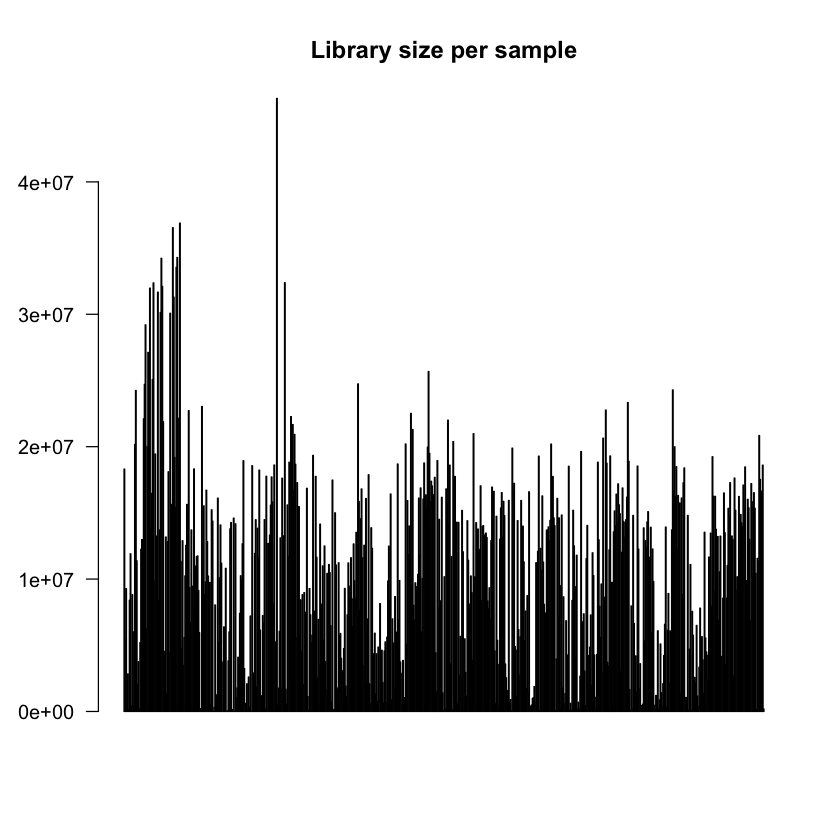

In [14]:
#Plot library size in millions of reads for each sample
options(scipen=-1)
barplot(x$samples$lib.size, horiz=F, names.arg=colnames(x$counts_matrix), las=2,
       main="Library size per sample")

In [15]:
# Select samples to keep
xSamplesToKeepMask = x$samples$lib.size > 10000000 # 10 million aligned reads
length(x$samples$lib.size)
sum(xSamplesToKeepMask==TRUE)

[1] 726

[1] 340

In [16]:
x = x[,xSamplesToKeepMask]
dim(x)

[1] 60683   340

# TMM Normalization

In [17]:
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)

keep.exprs <- rowSums(cpm>3)>=10

x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

x <- calcNormFactors(x, method = "TMM")

[1] 19360   340

In [18]:
# This cell supports future resizing of the plots in the Jupyter notebook
defaultWidth = getOption("repr.plot.width")
defaultHeight = getOption("repr.plot.height")
# This cell resizes the output for attractive side-by-side plots
#options(repr.plot.width=defaultWidth, repr.plot.height=defaultHeight*.7) 
# This cell sets the output graphic size back to the Jupyter notebook defaults
options(repr.plot.width=defaultWidth, repr.plot.height=defaultHeight) 

Warning message in brewer.pal(nsamples, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


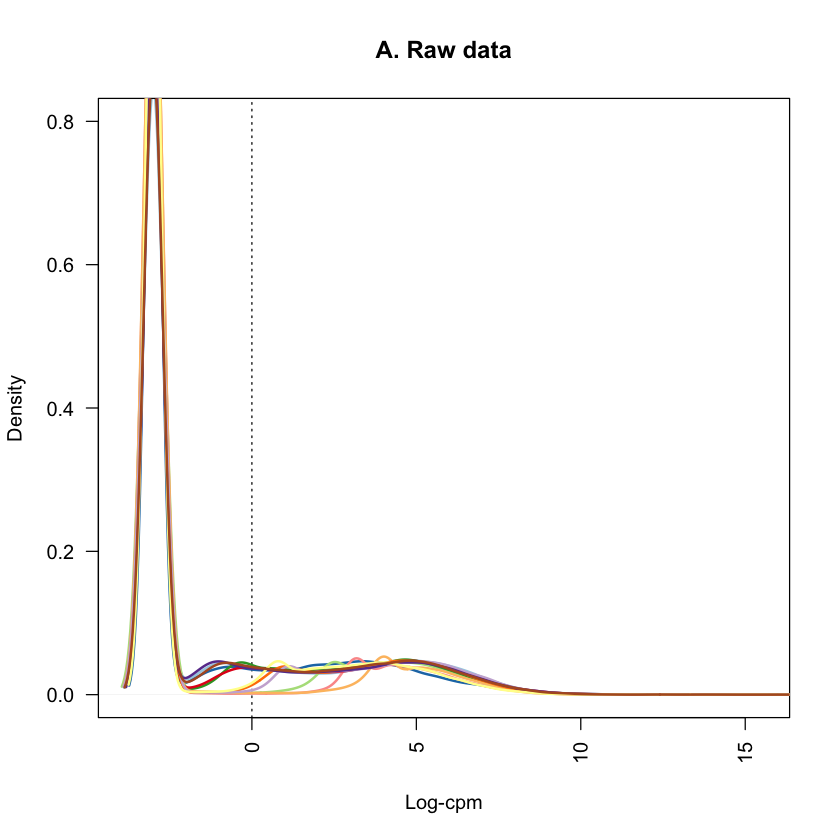

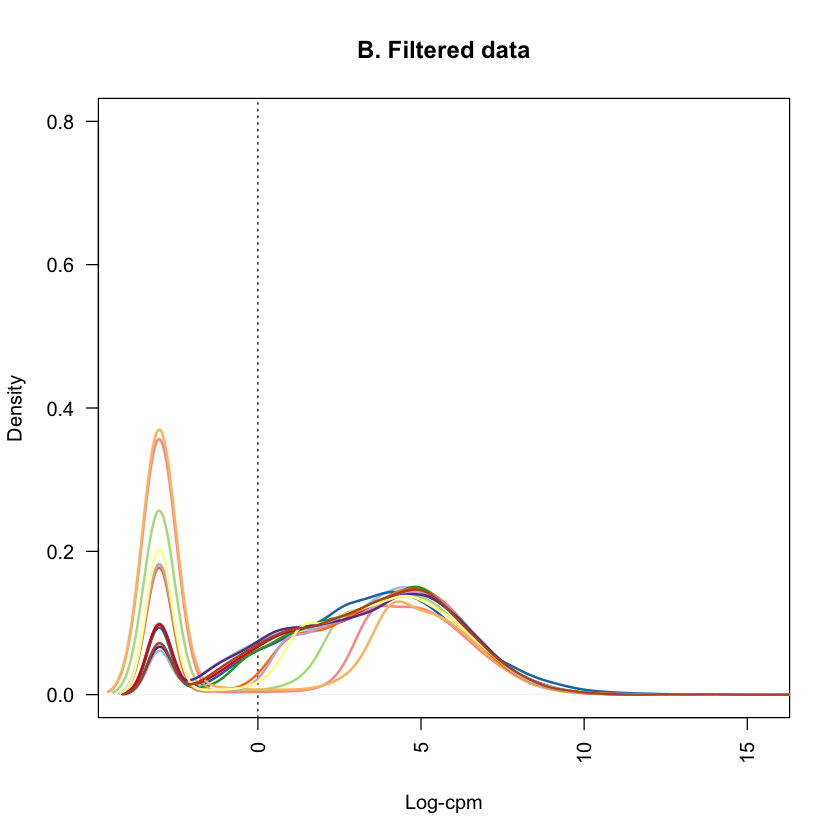

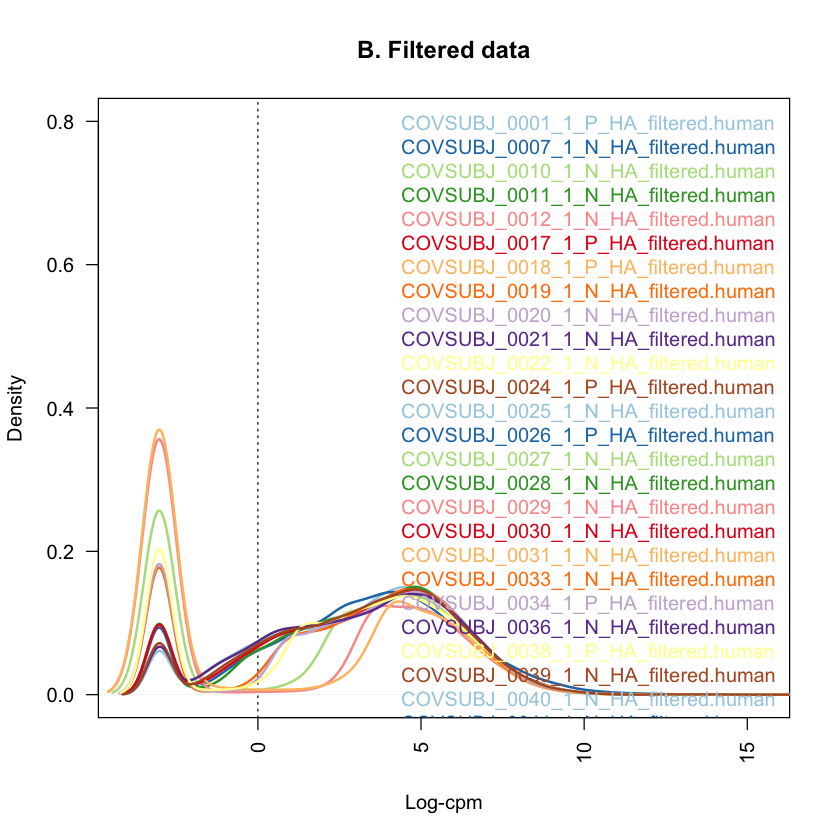

In [19]:
nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")
#par(mfrow=c(1,2)≥)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", colnames(x), text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", colnames(x), text.col=col, bty="n")

lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", colnames(x), text.col=col, bty="n")

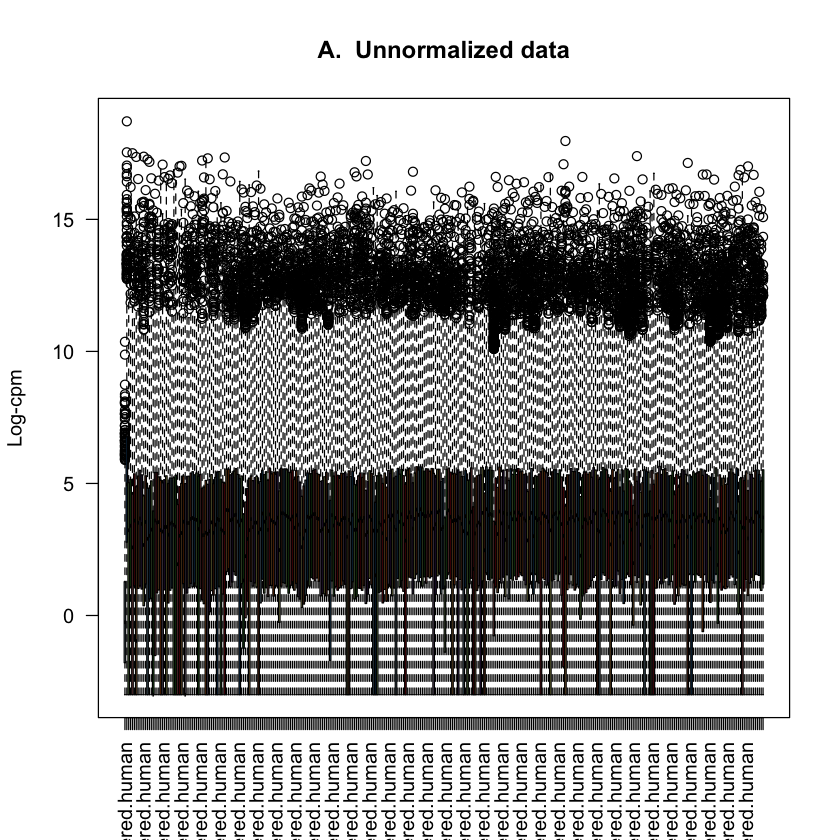

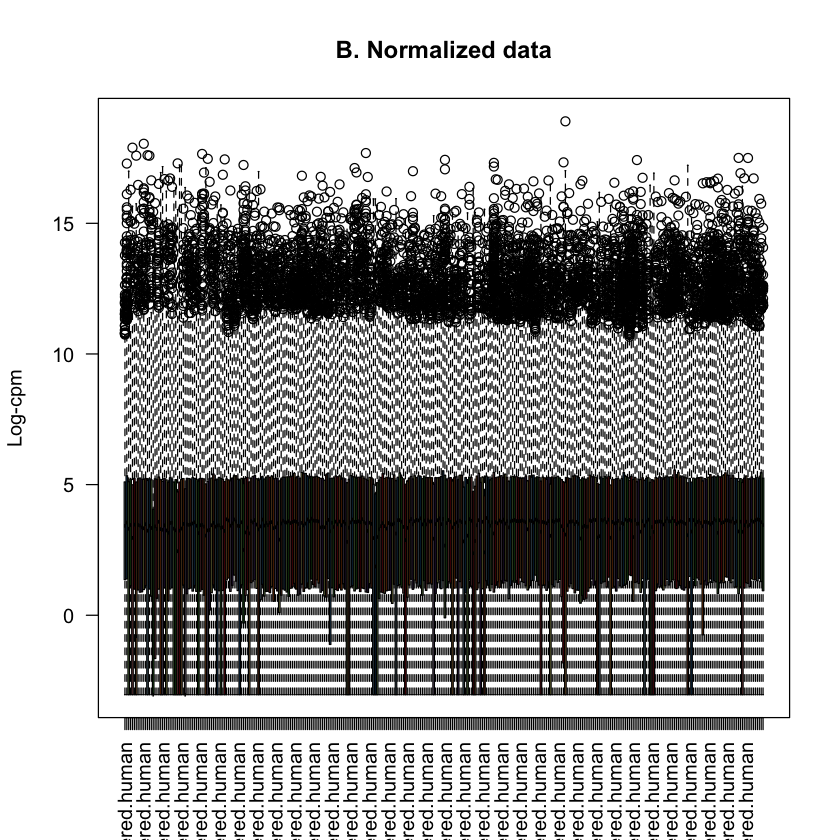

In [20]:
x2 <- x
x2$samples$norm.factors <- 1
x2$counts[,1] <- ceiling(x2$counts[,1]*0.05)
x2$counts[,2] <- x2$counts[,2]*5
#par(mfrow=c(1,2))
lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="A.  Unnormalized data",ylab="Log-cpm")
x2 <- calcNormFactors(x2)  

lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="B. Normalized data",ylab="Log-cpm")

In [21]:
Viral_L_Type <- as.factor(x$samples$Type)
sample_ids_for_mds<-as.factor(x$samples$newID)

# Perform differential expression analysis using limma-voom

In [22]:
design <- model.matrix(~0+Viral_L_Type)
colnames(design) <- c('Viral_LHigh', 'Viral_LMedium', 'Viral_LLow', 'Viral_LNone', 'Viral_LOther')
head(design)

Viral_LHigh Viral_LMedium Viral_LLow Viral_LNone Viral_LOther
1 1           0             0          0           0           
2 0           0             0          1           0           
3 0           0             0          1           0           
4 0           0             0          1           0           
5 0           0             0          1           0           
6 0           1             0          0           0

In [23]:
# Condition-Control
cm = makeContrasts(HighvsMedium = Viral_LHigh-Viral_LMedium, 
                   HighvsLow = Viral_LHigh-Viral_LLow, 
                   HighvsNone = Viral_LHigh-Viral_LNone, 
                   MediumvsNone = Viral_LMedium-Viral_LNone, 
                    MediumvsLow = Viral_LMedium-Viral_LLow,
                   LowvsNone = Viral_LLow-Viral_LNone, 
                   COVIDvsNone = (Viral_LHigh+ Viral_LMedium+Viral_LLow)/3-Viral_LNone,
                   OVIvsNone = Viral_LOther-Viral_LNone,
                   OVIvsLow = Viral_LOther-Viral_LLow,
                   OVIvsMedium = Viral_LOther-Viral_LMedium,
                   OVIvsHigh = Viral_LOther-Viral_LHigh,
                   OVIvsCOVID = (Viral_LHigh+ Viral_LMedium+Viral_LLow)/3 - Viral_LOther,
                   levels=colnames(design))
cm

Contrasts
Levels          HighvsMedium HighvsLow HighvsNone MediumvsNone MediumvsLow
  Viral_LHigh    1            1         1          0            0         
  Viral_LMedium -1            0         0          1            1         
  Viral_LLow     0           -1         0          0           -1         
  Viral_LNone    0            0        -1         -1            0         
  Viral_LOther   0            0         0          0            0         
               Contrasts
Levels          LowvsNone COVIDvsNone OVIvsNone OVIvsLow OVIvsMedium OVIvsHigh
  Viral_LHigh    0         0.3333333   0         0        0          -1       
  Viral_LMedium  0         0.3333333   0         0       -1           0       
  Viral_LLow     1         0.3333333   0        -1        0           0       
  Viral_LNone   -1        -1.0000000  -1         0        0           0       
  Viral_LOther   0         0.0000000   1         1        1           1       
               Contrasts
Levels          OVIvsCOVID
  Viral_LHigh    0.3333333
  Viral_LMedium  0.3333333
  Viral_LLow     0.3333333
  Viral_LNone    0.0000000
  Viral_LOther  -1.0000000

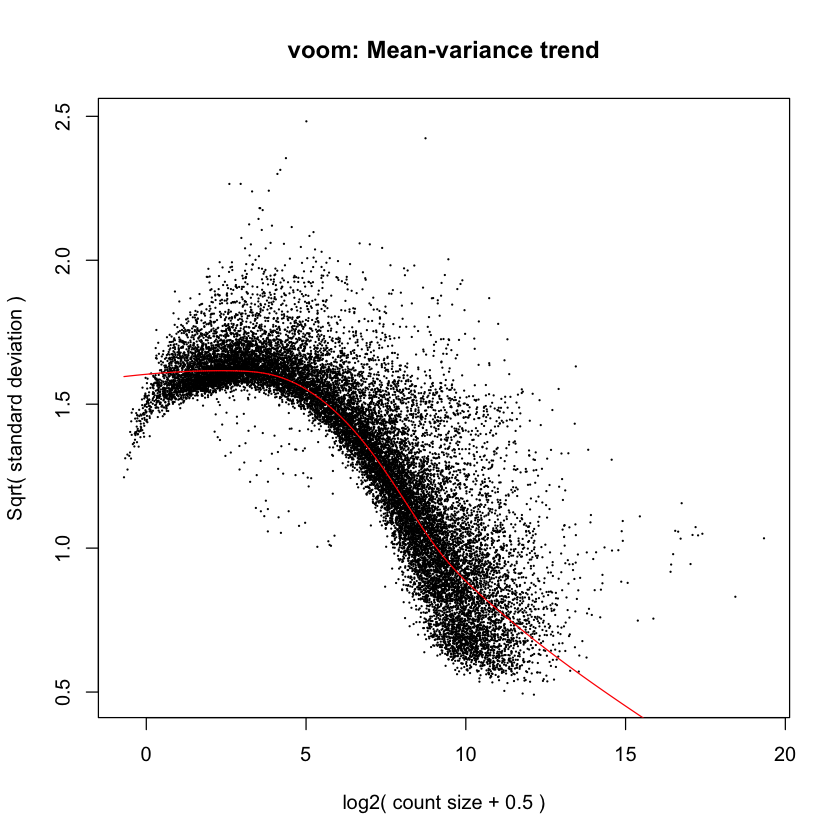

In [24]:
v <- voom(x, design, plot=TRUE)

In [25]:
# write.csv(v$E, sprintf("TMM_and_Voom_normalized_counts_%s_%s.csv", "MollyH", "20221117"))

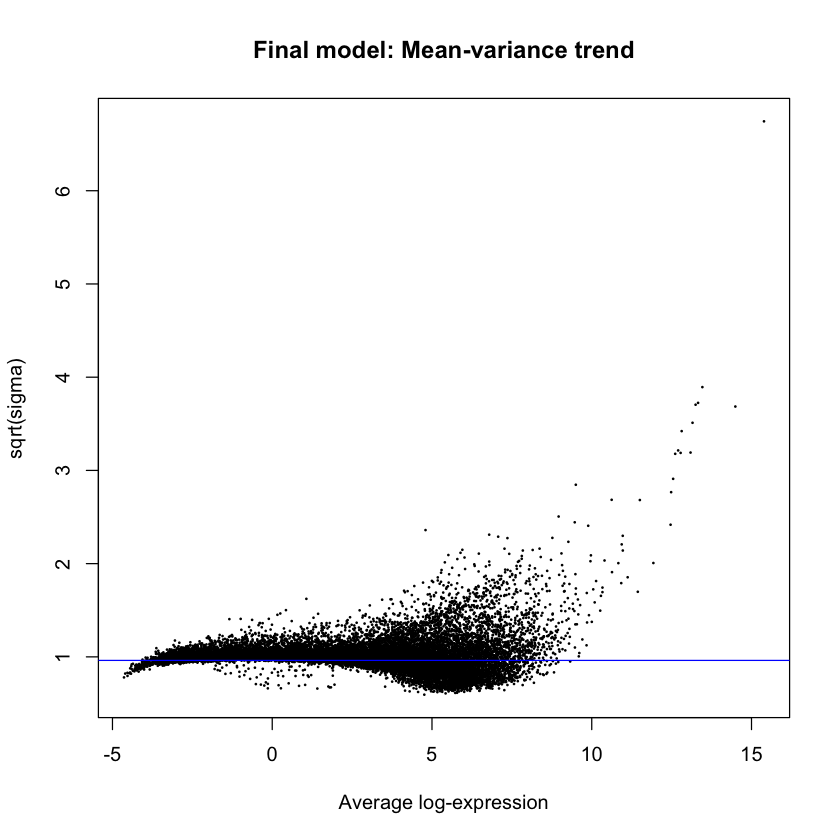

In [26]:
#input the inter-subject correlation into the linear model fit
#replace x$count with v after voom

vfit <- lmFit(v,design)

vfit <- contrasts.fit(vfit, contrasts=cm)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean-variance trend")

In [27]:
# All differentially expressed genes
dt <- decideTests(efit)
summary(dt)

       HighvsMedium HighvsLow HighvsNone MediumvsNone MediumvsLow LowvsNone
Down              0         0        197           43           0      1494
NotSig        19302     19348      18090        19147       19360     16999
Up               58        12       1073          170           0       867
       COVIDvsNone OVIvsNone OVIvsLow OVIvsMedium OVIvsHigh OVIvsCOVID
Down          1029      2791      496          95      1656        719
NotSig       16826     14890    18229       19234     17640      16963
Up            1505      1679      635          31        64       1678

In [28]:
# Differentially expressed genes with p-val < 0.2
dt_relaxed <- decideTests(efit, p.value=.2)
summary(dt_relaxed)

       HighvsMedium HighvsLow HighvsNone MediumvsNone MediumvsLow LowvsNone
Down              0         2        486          174           0      3628
NotSig        19169     18216      15979        18902       19360     14095
Up              191      1142       2895          284           0      1637
       COVIDvsNone OVIvsNone OVIvsLow OVIvsMedium OVIvsHigh OVIvsCOVID
Down          1976      5460     1889        1894      6021       1832
NotSig       14568     11246    15405       16677     12819      12877
Up            2816      2654     2066         789       520       4651

In [29]:
# Differentially expressed genes with p-val < 0.
dt_strict_for_enrichment <- decideTests(efit, p.value=.05, lfc=1)
summary(dt_strict_for_enrichment)

       HighvsMedium HighvsLow HighvsNone MediumvsNone MediumvsLow LowvsNone
Down              0         0          3           12           0       556
NotSig        19325     19348      18529        19232       19360     18422
Up               35        12        828          116           0       382
       COVIDvsNone OVIvsNone OVIvsLow OVIvsMedium OVIvsHigh OVIvsCOVID
Down           101      1185      165          56      1329        245
NotSig       18659     17223    18855       19291     18029      18217
Up             600       952      340          13         2        898

# Heatmaps

In [30]:
# Color palette
jewels <- c("#81abce", "#8ead98", "#f6bd60", "#f578a0", "#9080a7")
jewels2 <- c("#f578a0", "#8ead98", "#f6bd60", "#81abce", "#9080a7")

In [31]:
contrast_list <- colnames(cm)
# for (i in contrast_list){
#     glMDPlot(efit, 
#              coef=i, 
#              status=dt, 
#              main=i,
#              counts=v$E, 
#              anno=v$genes[,c("ENTREZID", "SYMBOL")],
#              groups=v$targets$Type, 
#              side.ylab="Normalized logCPM",
#              html=sprintf("MD-Plot_%s_%s_%s", i, "MollyH", "20221117"), 
#              launch=F)
#     }

In [32]:
# contrast_list <- colnames(cm)
# for (i in contrast_list){
#     df <- topTreat(efit, coef=i, n=Inf, sort.by="p")
#     write.csv(df, sprintf("DE_Coeff%s_%s_%s.csv", i, "MollyH", "20221117"))
#     #head(df)
#     sig_df <- subset(df, adj.P.Val <1)
#     topgenes <- row.names(sig_df)[1:50]
#     k <- which(row.names(v$E) %in% topgenes)
#     my_group=as.factor(v$targets$Type)
#     my_col=brewer.pal(12, "Set1")[my_group]
#     mycol <- colorpanel(1000,"blue","white","red")
#     heatmap.2(v$E[k,], scale="row",
#        labRow=v$genes$SYMBOL[k], labCol=v$targets$SampleID,  #legend = unique(my_group), 
#        col=mycol, trace="none", density.info="none", ColSideColors=my_col, key=T, dendrogram="column", main = i)
#        #margin=c(10,10), lhei=c(2,10),

#     #heatmap.2(DMPs1.sig, scale="row", col = coul, cexRow=.5, labCol=pheno$Sample_Name,
#     #   ColSideColors=my_col, key=T, trace="none", margins=c(5,10))
#     legend("left", fill = unique(my_col), cex = .5, legend = unique(my_group), inset=c(0,0))
#     #dev.off()
#     }

In [33]:
unique(v$targets$Type)

[1] "High"                "None"                "Low"                
[4] "Medium"              "OtherViralInfection"

In [34]:
colnames(cm)

[1] "HighvsMedium" "HighvsLow"    "HighvsNone"   "MediumvsNone" "MediumvsLow" 
 [6] "LowvsNone"    "COVIDvsNone"  "OVIvsNone"    "OVIvsLow"     "OVIvsMedium" 
[11] "OVIvsHigh"    "OVIvsCOVID"

In [35]:
VL_High=which(v$targets$Type=="High")
VL_Medium=which(v$targets$Type=="Medium")
VL_Low=which(v$targets$Type=="Low")
VL_None =which(v$targets$Type=="None")
Vl_Other=which(v$targets$Type=="OtherViralInfection")

## Custom Heatmap Pathways

In [36]:
a <- "COVIDvNORM_INTERFERON"
path_name <- c("BST2", "DDX58", "EIF2AK2", "GBP3", "GBP4", "IFIT3", "IFNGR1", "IRF9", "ISG20", "MX1", 
                          "MX2", "OAS3", "OASL", "PML", "SAMHD1", "SP100", "STAT1", "TRIM38", "USP18", "TRIM22", 
                          "ICAM1", "TRIM14", "IFI30", "EIF4G3", "NUP98", "STAT2", "TRIM2", "TRIM5")

In [37]:
pdf_name <-paste("Heatmap_COVIDvsNone", a, sep="_")
pdf_name <-paste(pdf_name, '.pdf', sep="")
pdf(pdf_name)

vE <- v$E
row.names(vE) <- v$genes$SYMBOL

ordered <- c(VL_None,VL_Low, VL_Medium, VL_High)
contrast_list <- c("COVIDvsNone")
current_col <- c("#f578a0", "#8ead98","#f6bd60",  "#81abce")

for (i in contrast_list){
    #df <- topTreat(efit, coef=i, n=Inf, sort.by="p")
    #write.csv(df, sprintf("DE_Coeff%s_%s_%s.csv", i, name, name2))
    #sig_df <- subset(df, adj.P.Val <1)
    
    topgenes <- path_name #row.names(sig_df)[1:200]
    k <- which(row.names(vE) %in% topgenes)
    my_group=as.factor(v$targets$Type[ordered])
    my_col=current_col[my_group]
    mycol <- colorpanel(100,"blue","white","red")
    
    heatmap.2(vE[k,ordered], scale="row", labRow=v$genes$SYMBOL[k], labCol=v$targets$Sample_ID[ordered],
              col=mycol, trace="none", density.info="none", ColSideColors=my_col,  key=T, dendrogram="column",
              main = i,Colv=FALSE, margin=c(10,10), lhei=c(2,10), cexCol=.5)
    legend("topright", fill = unique(my_col), cex = .4, legend = unique(my_group), inset=c(0,0))
    
    heatmap.2(vE[k,ordered], scale="row", main = i, Colv=FALSE,
                labRow=v$genes$SYMBOL[k], labCol=v$targets$Sample_ID[ordered],
                col=mycol, trace="none", ColSideColors=my_col, 
                density.info = "none", dendrogram="row", key = TRUE,
                margin=c(10,10), lhei=c(2,10), cexCol=.5)
    legend("topright", fill = unique(my_col), cex = .4, legend = unique(my_group), inset=c(0,0))
    }

dev.off()

Warning message in heatmap.2(vE[k, ordered], scale = "row", labRow = v$genes$SYMBOL[k], :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”


pdf 
  2

# gProfiler

In [38]:
# install.packages("gprofiler2")
library(gprofiler2)

In [57]:
gGProfiler2OrganismName = "hsapiens"
runGProfiler2 = function(efitObject, deliverablesPath, coefficientName, species, maxAdjPVal=0.05){
    tryCatch({
        outputDir <- paste0(deliverablesPath, "/gprofiler")
        dir.create(outputDir, showWarnings = FALSE)
        top <- topTreat(efitObject, coef = coefficientName, n = Inf, sort.by = 'p')
        top <- top[!is.na(top$ENTREZID),]
        top <- top[!duplicated(top$ENTREZID),]
        tg1 <- subset(top, adj.P.Val<maxAdjPVal)
        DE_genes <- tg1$ENTREZID
        ALL_genes <- top$ENTREZID
        
        gostres <- gost(query = DE_genes, 
                        organism = species, 
                        ordered_query = FALSE, 
                        multi_query = FALSE, 
                        significant = TRUE, 
                        exclude_iea = FALSE,
                        measure_underrepresentation = FALSE, 
                        evcodes = TRUE,
                        user_threshold = maxAdjPVal, 
                        correction_method = "fdr",
                        domain_scope = "custom_annotated", 
                        custom_bg = ALL_genes, 
                        numeric_ns = "", 
                        sources = NULL, 
                        as_short_link = FALSE)
        
        gpro_res <- gostres$result[,c("p_value", "term_size", "query_size", "intersection_size", "precision","recall", "term_id", "source", "term_name", "intersection")]
        write.csv(gpro_res, sprintf('%s/%s_GProfiler_ORA_strict_%s.csv', outputDir, gRunName, coefficientName), row.names = FALSE)
        
        p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
        pp <- publish_gostplot(p, highlight_terms = gostres$result[c(1:5),], width = NA, height = NA, filename = sprintf("%s/%s_GProfiler_plot_ORA_strict_%s.pdf", outputDir, gRunName, coefficientName))
        gostres_link <- gost(query = DE_genes, 
                             organism = species, 
                             ordered_query = FALSE, 
                             multi_query = FALSE, 
                             significant = TRUE, 
                             exclude_iea = FALSE, 
                             measure_underrepresentation = FALSE, 
                             evcodes = TRUE, 
                             user_threshold = 0.05, 
                             correction_method = "fdr", 
                             domain_scope = "custom_annotated", 
                             custom_bg = ALL_genes, 
                             numeric_ns = "", 
                             sources = NULL, 
                            as_short_link = TRUE)
        link_df <- data.frame("Contrast" = coefficientName, "GProfiler_interactive_link" = gostres_link)
        write.csv(link_df, sprintf("%s/%s_Gprofiler_interactive_linkdf_%s.csv", outputDir, gRunName, coefficientName), row.names = FALSE)
    }, error=function(e){print(paste0("runGProfiler2 failed for maxAdjPval <", maxAdjPVal, " with message:", e))})
}

globalRunGProfiler2 = function(coefficientName){
    runGProfiler2(gModeratedVoomedFitForContrastsWithLogFcThreshold, gDeliverablesDir, coefficientName, gGProfiler2OrganismName, maxAdjPVal=0.05)
}

In [58]:
gDeliverablesDir <-getwd()
deliverablesPath <- getwd()
gRunName <-2021122
gModeratedVoomedFitForContrastsWithLogFcThreshold <- efit

In [59]:
try <- colnames(cm)

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_HighvsMedium.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_HighvsLow.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



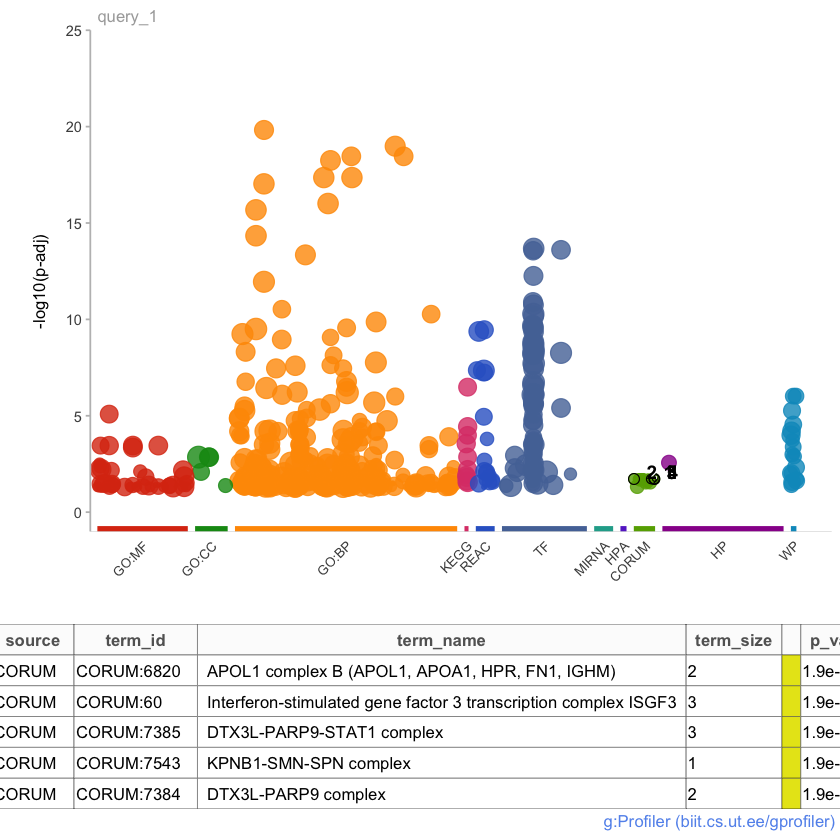

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_HighvsNone.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



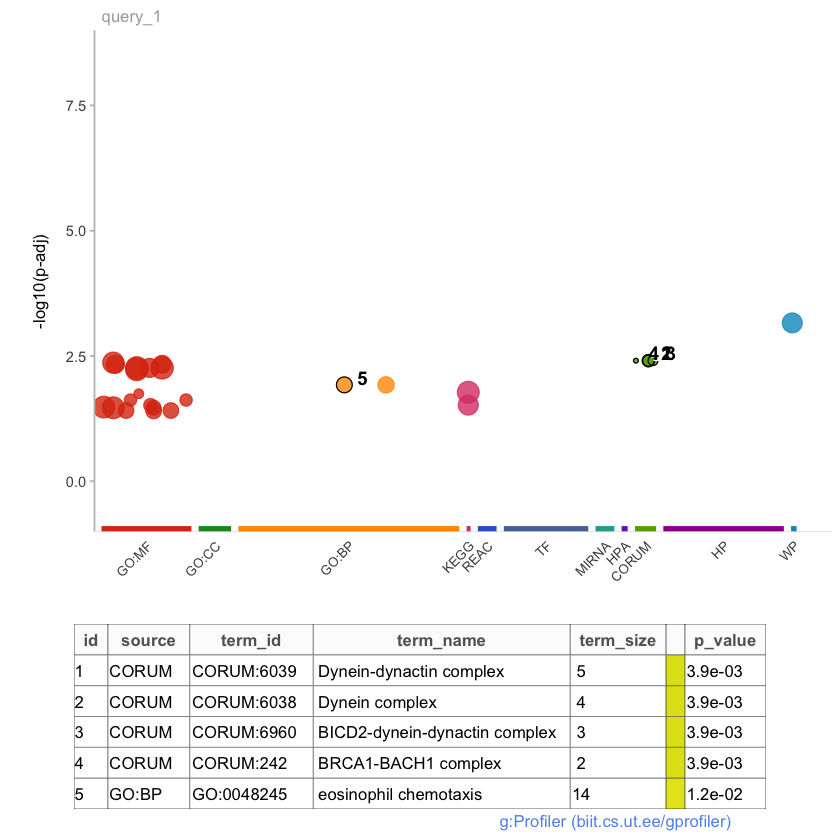

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_MediumvsNone.pdf



[1] "runGProfiler2 failed for maxAdjPval <0.05 with message:Error in gost(query = DE_genes, organism = species, ordered_query = FALSE, : Missing query\n"


The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



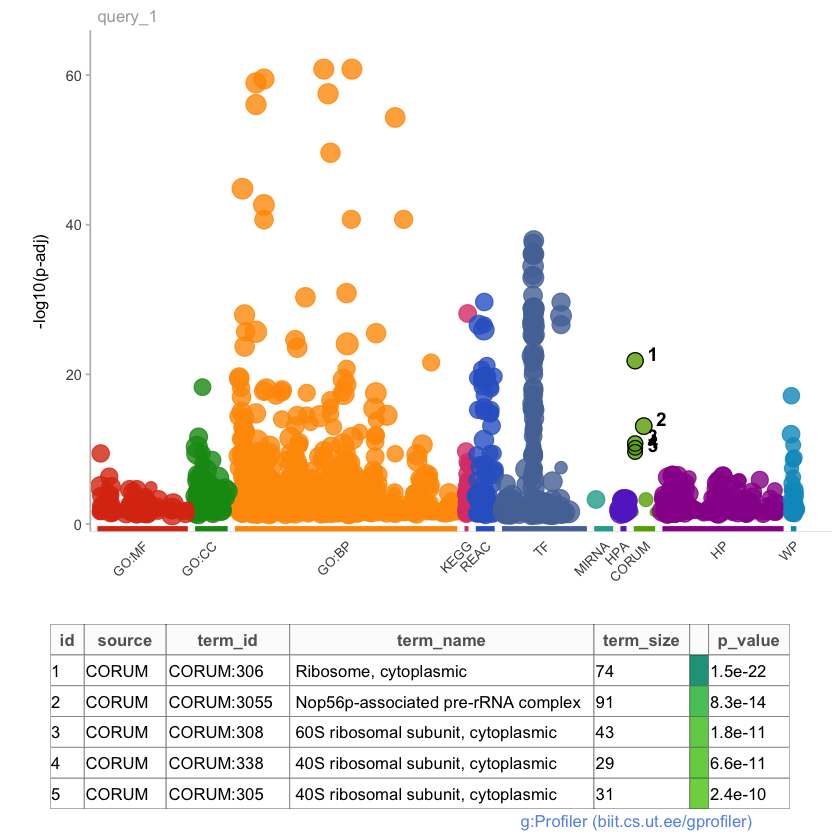

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_LowvsNone.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



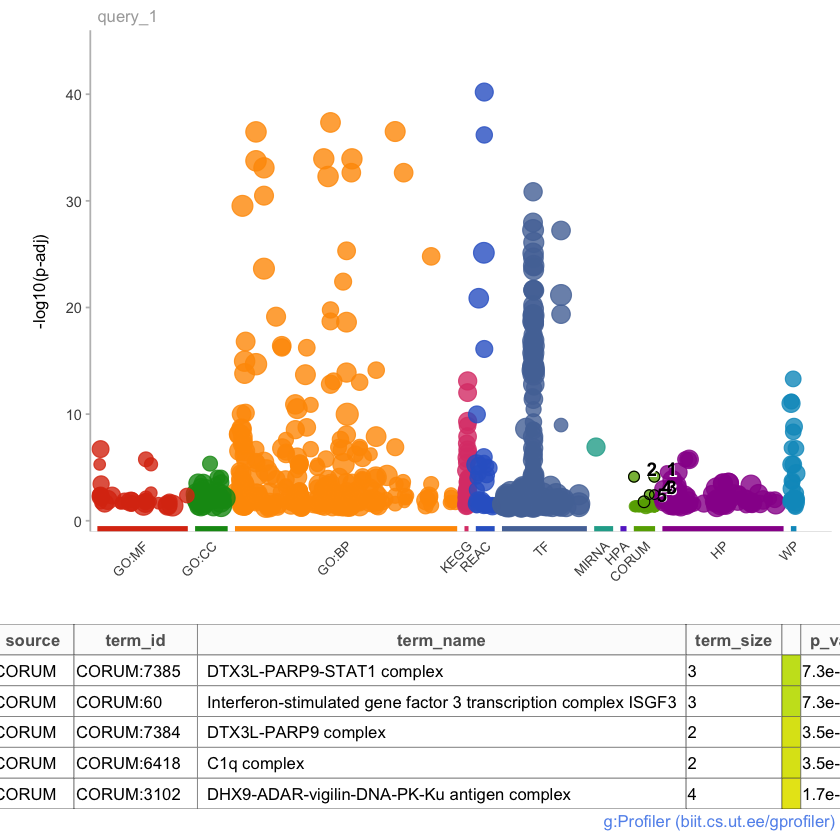

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_COVIDvsNone.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



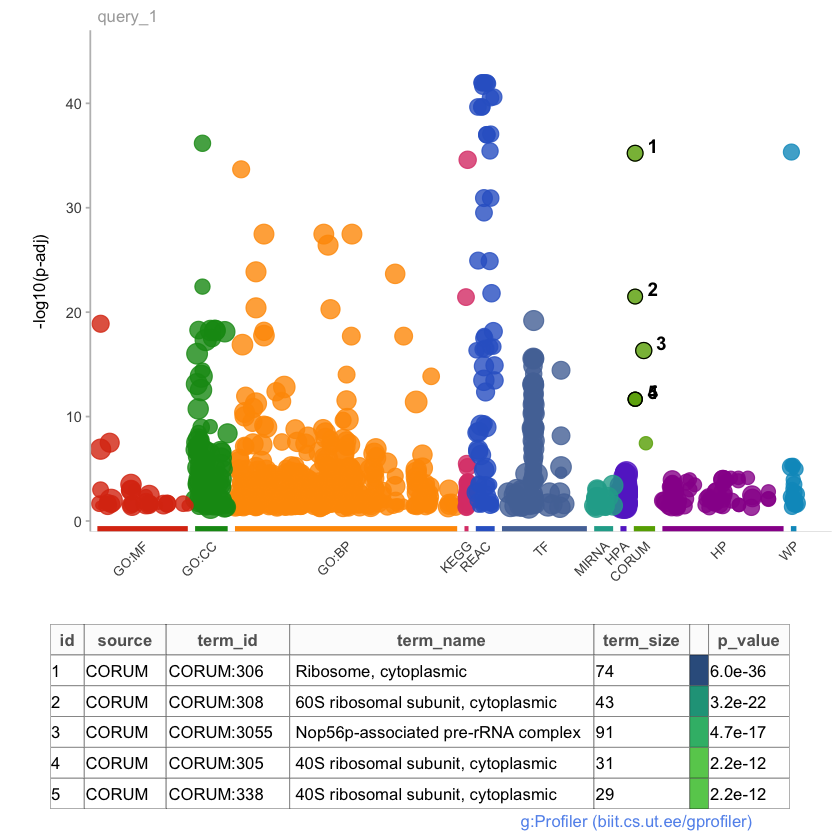

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_OVIvsNone.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



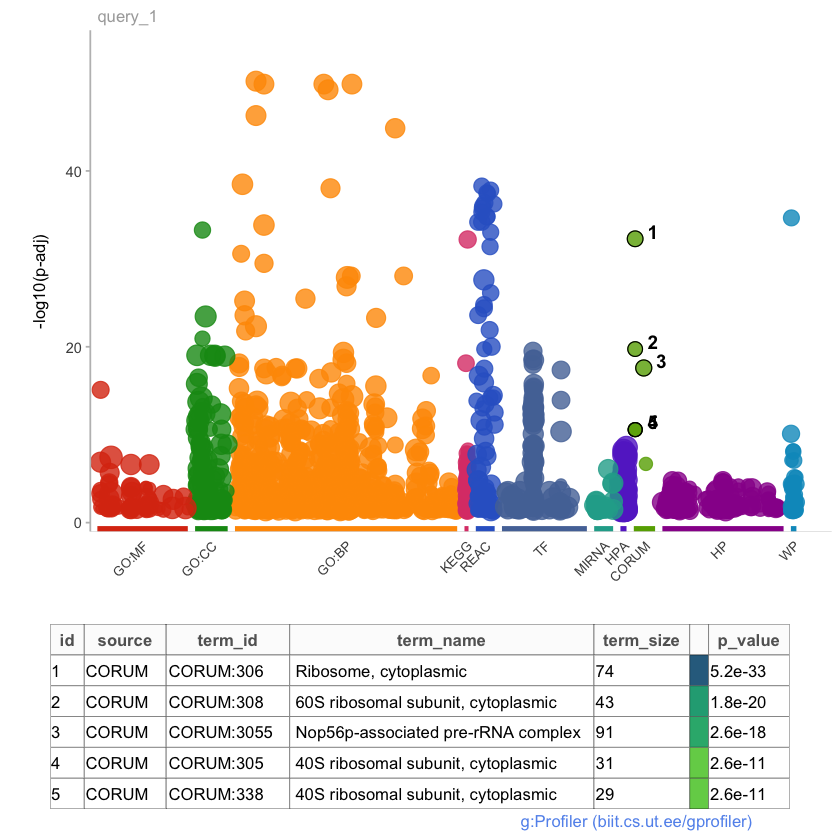

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_OVIvsLow.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



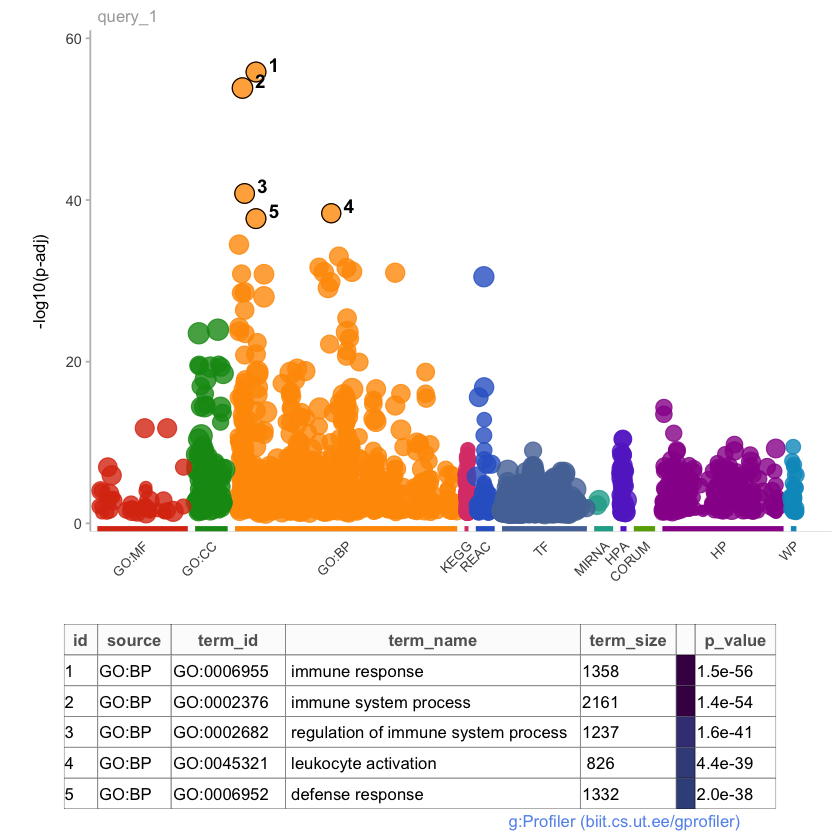

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_OVIvsMedium.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



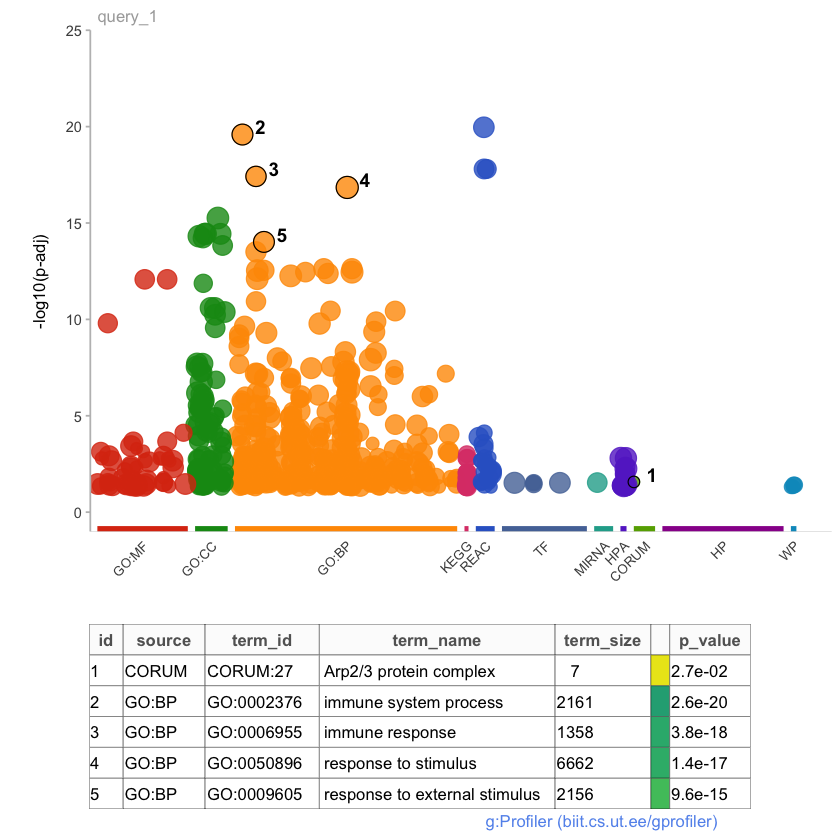

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_OVIvsHigh.pdf

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.



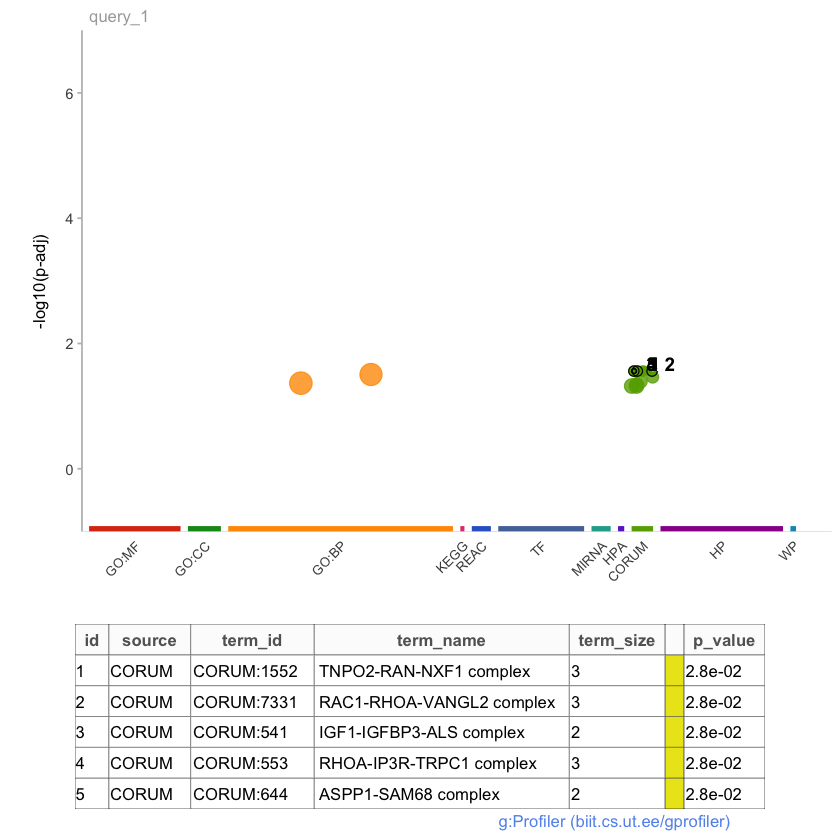

The image is saved to /Users/mollyhuang/Desktop/covid/gprofiler/2021122_GProfiler_plot_ORA_strict_OVIvsCOVID.pdf



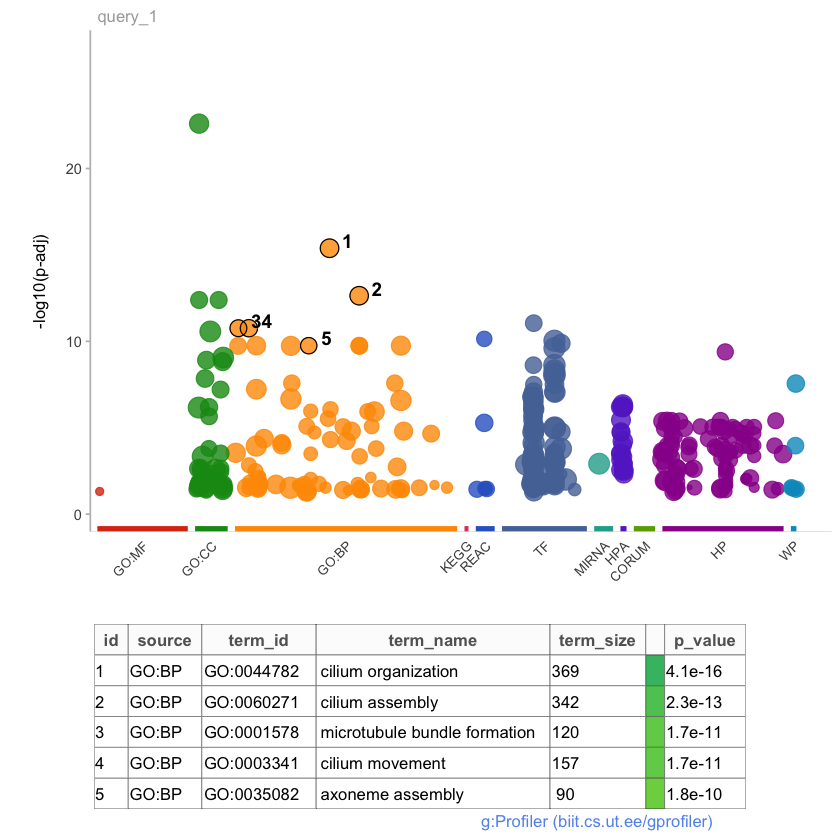

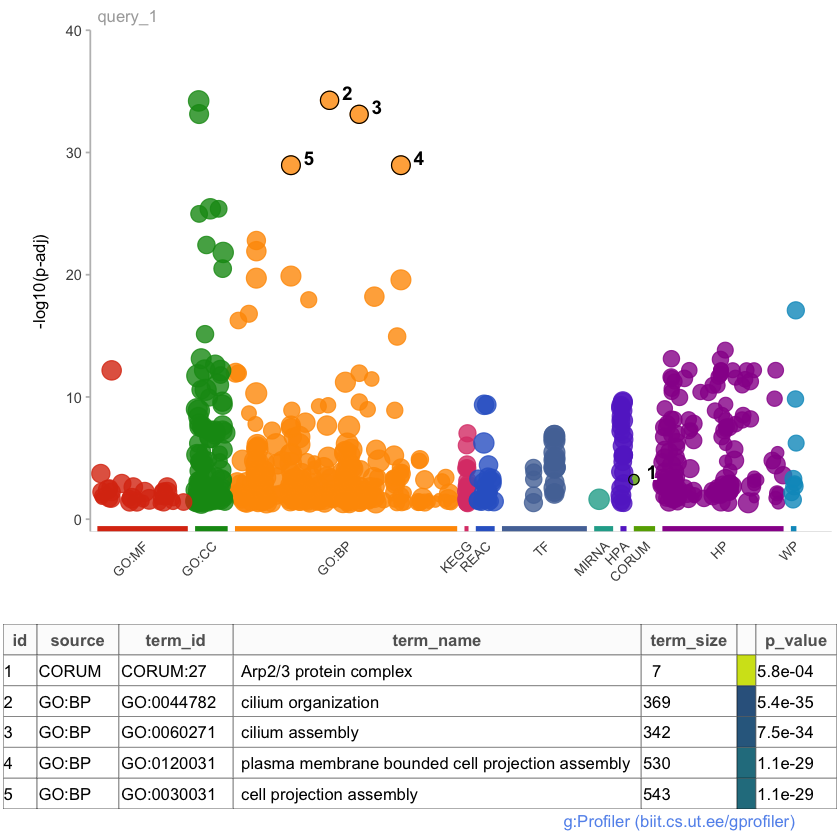

In [60]:
for(coeff in try){
    globalRunGProfiler2(coeff)
}

## gProfiler HeatMap

In [62]:
COVIDVsNone <- read.csv("gprofiler/2021122_GProfiler_ORA_strict_COVIDvsNone.csv", stringsAsFactors = F)
HighVsNone <- read.csv("gprofiler/2021122_GProfiler_ORA_strict_HighvsNone.csv", stringsAsFactors = F)
MedVsNone <- read.csv("gprofiler/2021122_GProfiler_ORA_strict_MediumvsNone.csv", stringsAsFactors = F)
LowVsNone <- read.csv("gprofiler/2021122_GProfiler_ORA_strict_LowvsNone.csv", stringsAsFactors = F)
allCSVs <- list(COVIDVsNone, HighVsNone, MedVsNone, LowVsNone)

In [63]:
# Keep sources of interest (GO:BP, REACTOME, WP)
# Remove non p-value and term rows 
clean_data = function(CSV, name){
    CSV<-CSV[(CSV$source=="GO:BP" | CSV$source=="REAC" | CSV$source == "WP"),]
    CSV <-CSV[,c("p_value", "term_name")]
    CSV["p_value"] <- -log10(CSV$p_value)
    colnames(CSV) <- c(name, "term_name")
    return(CSV)
}

In [64]:
COVIDVsNone <-clean_data(COVIDVsNone, "COVIDVsNone_p_value")
HighVsNone<-clean_data(HighVsNone, "HighVsNone_p_value")
MedVsNone<-clean_data(MedVsNone, "MedVsNone_p_value")
LowVsNone <- clean_data(LowVsNone, "LowVsNone_p_value")

In [65]:
df_All <- merge(COVIDVsNone, HighVsNone)
df_All <- merge(df_All, MedVsNone)
df_All <- merge(df_All, LowVsNone)
rownames(df_All)<-df_All$term_name
df_All = subset(df_All, select = -c(term_name))

head(df_All)

COVIDVsNone_p_value
activation of immune response                                                                                              9.818371          
adaptive immune response                                                                                                  13.809349          
adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains  7.720939          
Adaptive Immune System                                                                                                     5.999172          
Allograft rejection                                                                                                        7.068666          
alpha-beta T cell activation                                                                                               9.327852          
                                                                                                                          HighVsNone_p_value
activation of immune response                                                                                              9.087119         
adaptive immune response                                                                                                  16.958742         
adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains 12.956981         
Adaptive Immune System                                                                                                     3.722989         
Allograft rejection                                                                                                        8.836092         
alpha-beta T cell activation                                                                                               4.669006         
                                                                                                                          MedVsNone_p_value
activation of immune response                                                                                             9.986732         
adaptive immune response                                                                                                  8.542953         
adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains 7.482986         
Adaptive Immune System                                                                                                    5.259959         
Allograft rejection                                                                                                       8.820086         
alpha-beta T cell activation                                                                                              1.668080         
                                                                                                                          LowVsNone_p_value
activation of immune response                                                                                             3.648212         
adaptive immune response                                                                                                  4.605476         
adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains 3.295096         
Adaptive Immune System                                                                                                    2.725447         
Allograft rejection                                                                                                       3.500732         
alpha-beta T cell activation                                                                                              2.747080

In [66]:
heatmap_pathways <- c("type I interferon production", "Host-pathogen interaction of human coronaviruses - interferon induction",
                      "ISG15 antiviral mechanism", "SARS-CoV-2 innate immunity evasion and cell-specific immune response",
                      "negative regulation of viral genome replication", "Type II interferon signaling",
                      "Cytokine Signaling in Immune system", "detection of virus", "alpha-beta T cell activation",
                      "positive regulation of cell activation", "regulation of cytokine production",
                      "viral life cycle", "response to interferon-gamma",
                      "positive regulation of innate immune response", "regulation of type I interferon-mediated signaling pathway",
                      "SARS coronavirus and innate immunity", "cellular response to exogenous dsRNA",
                      "cellular response to virus", "viral entry into host cell", "cellular response to dsRNA",
                      "response to type I interferon", "T cell activation", "regulation of viral entry into host cell",
                     "T cell mediated immunity", "MDA-5 signaling pathway", "Antiviral mechanism by IFN-stimulated genes")

In [67]:
df_heatmap <- df_All[heatmap_pathways,]

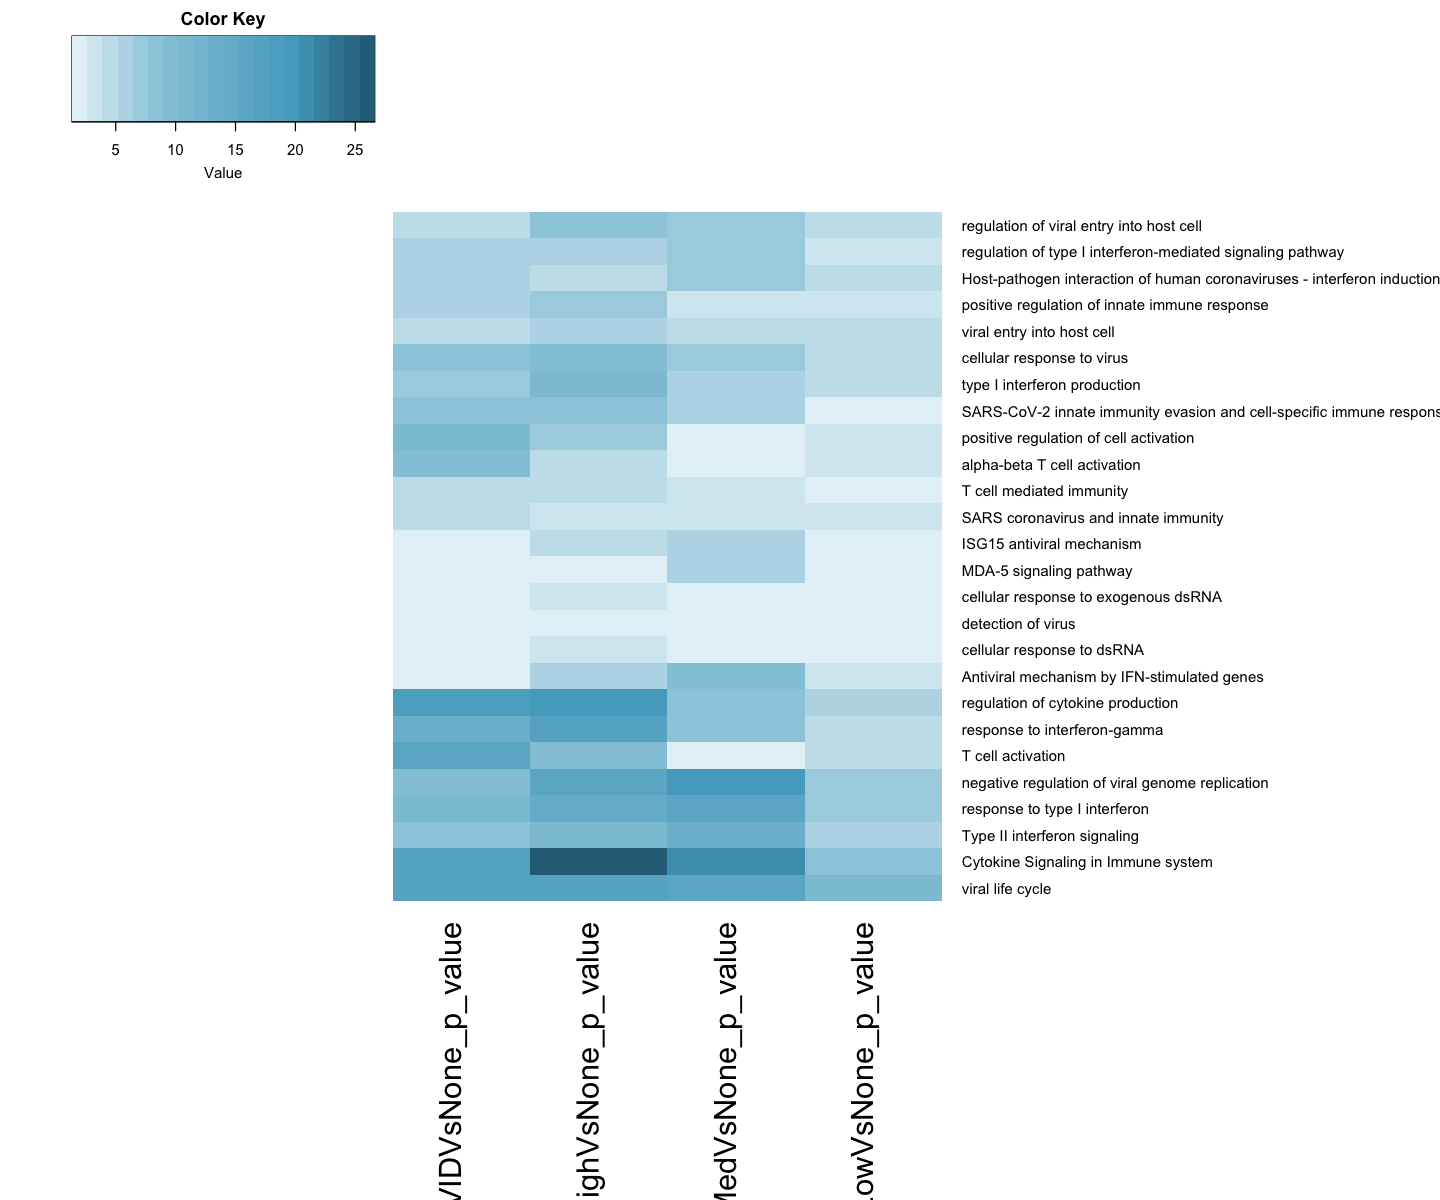

In [62]:
options(repr.plot.width=12, repr.plot.height=10) 
mycolors <- colorRampPalette(c("#e3f1f6", "#9FCEE0", "#78BBD3", "#52A8C7", "#2C6E87"))(20)
heatmap.2(as.matrix(df_heatmap), scale = "none", trace = "none", density.info = "none", col = mycolors, 
          margin=c(15,25), lhei=c(3,14), dendrogram="none", Colv = FALSE)

In [68]:
pdf("F2B_EnrichedPathways.pdf", width = 12, height = 10)
mycolors <- colorRampPalette(c("#e3f1f6", "#9FCEE0", "#78BBD3", "#52A8C7", "#2C6E87"))(20)
heatmap.2(as.matrix(df_heatmap), scale = "none", trace = "none", density.info = "none", col = mycolors, 
          margin=c(15,25), lhei=c(3,14), dendrogram="none", Colv = FALSE)
dev.off()

pdf 
  2

In [63]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/mollyhuang/opt/miniconda3/envs/bulk_rnaseq/lib/libopenblasp-r0.3.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] dplyr_1.0.9            ggplot2_3.3.6          gprofiler2_0.2.1      
 [4] Glimma_2.4.0           gplots_3.1.3           edgeR_3.36.0          
 [7] limma_3.50.3           mygene_1.30.0          GenomicFeatures_1.46.5
[10] AnnotationDbi_1.56.2   Biobase_2.54.0         GenomicRanges_1.46.1  
[13] GenomeInfoDb_1.30.1    IRanges_2.28.0         S4Vectors_0.32.4      
[16] BiocGenerics_0.40.0    gdata_2.18.0           RColorBrewer_1.1-3    

loaded via a namespace (and not attached):
  [1] colorspace_2.0-3            rjson_0.2.21              